In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

In [70]:
baseball=pd.read_csv('baseball.csv')

In [71]:
baseball

,순,이름,연도,WAR,-,타석,타수,득점,안타,2루타,...,희생타,희생플라이,타율,출루,장타,OPS,wOBA,wRC+,WAR2,--
0,1,삼성,97,38.92,1511,4976,4305,722,1194,254,...,88,32,0.277,0.356,0.462,0.819,0.359,124.0,38.92,NaN
1,2,삼성,93,38.88,1667,5000,4369,613,1169,169,...,53,38,0.268,0.344,0.408,0.752,0.349,126.9,38.88,NaN
2,3,LG,94,38.57,1541,4886,4265,655,1204,205,...,54,41,0.282,0.358,0.409,0.767,0.352,123.6,38.57,NaN
3,4,현대,0,38.53,1633,5240,4478,777,1245,246,...,74,46,0.278,0.365,0.483,0.849,0.369,119.2,38.53,NaN
4,5,삼성,2,38.22,1599,5304,4648,777,1321,266,...,55,34,0.284,0.360,0.472,0.831,0.362,122.7,38.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,롯데,2,8.23,1757,4986,4512,463,1105,206,...,49,22,0.245,0.305,0.356,0.661,0.295,76.7,8.23,NaN
339,340,쌍방울,99,7.43,1639,5054,4462,523,1108,177,...,76,33,0.248,0.320,0.358,0.678,0.303,71.9,7.43,NaN
340,341,삼미,82,6.11,867,2954,2653,302,637,117,...,33,17,0.240,0.304,0.345,0.648,0.298,79.0,6.11,NaN
341,342,KIA,15,5.51,2022,5454,4777,648,1197,223,...,79,43,0.251,0.326,0.392,0.718,0.320,79.0,5.51,NaN


3. 키움(전 넥슨) 히어로즈의 2016년 경기장 이전으로 인한 타격 지표의 변화

기존의 목동 구장에서 고척돔으로 옮기면서 달라진 구장에 관련하여 지표가 어떻게 달라졌는지 알아보자.

- 타수, 득점, 안타, 타율

In [72]:
# 살펴볼 타격 지표인 타율 출루 장타 삼진 병살을 추출
baseball = baseball[['이름', '연도','타율', '출루', '장타']]
baseball

,이름,연도,타율,출루,장타
0,삼성,97,0.277,0.356,0.462
1,삼성,93,0.268,0.344,0.408
2,LG,94,0.282,0.358,0.409
3,현대,0,0.278,0.365,0.483
4,삼성,2,0.284,0.360,0.472
...,...,...,...,...,...
338,롯데,2,0.245,0.305,0.356
339,쌍방울,99,0.248,0.320,0.358
340,삼미,82,0.240,0.304,0.345
341,KIA,15,0.251,0.326,0.392


In [73]:
baseball['이름'].unique()

array(['삼성', 'LG', '현대', '두산', '빙그레', '롯데', '넥센', 'NC', '해태', '키움', 'KIA',
       'SK', 'OB', '한화', 'SSG', '쌍방울', 'KT', '해태/KIA', '히어로즈', 'MBC',
       '삼미/청보', '태평양', 'kt', '청보', '삼미'], dtype=object)

In [74]:
nexen = baseball[(baseball.이름=='넥센') | (baseball.이름 =='키움')]
nexen

,이름,연도,타율,출루,장타
16,넥센,14,0.298,0.382,0.509
22,키움,19,0.282,0.354,0.414
27,넥센,15,0.298,0.372,0.486
54,넥센,13,0.272,0.358,0.413
93,키움,20,0.269,0.355,0.408
136,넥센,12,0.243,0.325,0.370
140,넥센,18,0.288,0.355,0.448
144,넥센,16,0.293,0.368,0.440
145,넥센,17,0.290,0.357,0.437
165,키움,21,0.259,0.347,0.376


In [75]:
nexen2 = nexen.groupby(['연도'], as_index=False).mean()
nexen2

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_42652\620416458.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nexen2 = nexen.groupby(['연도'], as_index=False).mean()


,연도,타율,출루,장타
0,10,0.262,0.340,0.374
1,11,0.245,0.323,0.353
2,12,0.243,0.325,0.370
3,13,0.272,0.358,0.413
4,14,0.298,0.382,0.509
5,15,0.298,0.372,0.486
6,16,0.293,0.368,0.440
7,17,0.290,0.357,0.437
8,18,0.288,0.355,0.448
9,19,0.282,0.354,0.414


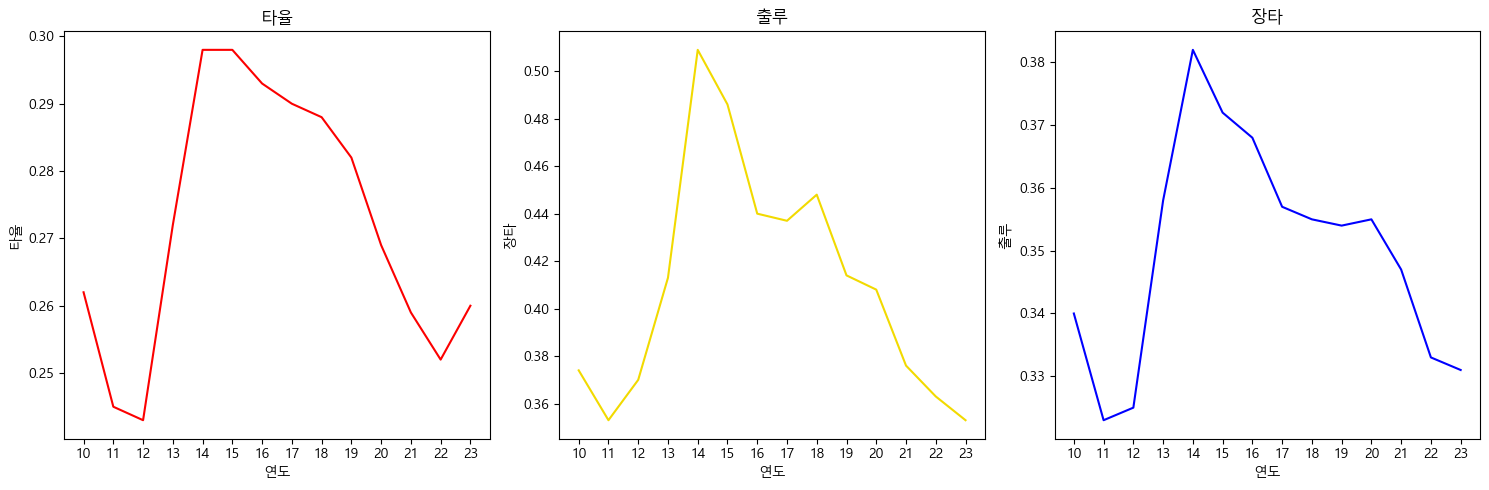

In [77]:
# 그래프 크기 설정
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# 첫 번째 서브플롯에 선 그래프 그리기
sns.lineplot(x=nexen2['연도'], y=nexen2['타율'], ax=ax[0], color='#fc0000')
ax[0].set_title('타율')

# 두 번째 서브플롯에 선 그래프 그리기
sns.lineplot(x=nexen2['연도'], y=nexen2['출루'], ax=ax[2], color='#0000ff')
ax[1].set_title('출루')

# 세 번째 서브플롯에 선 그래프 그리기
sns.lineplot(x=nexen2['연도'], y=nexen2['장타'], ax=ax[1], color='#f2da00')
ax[2].set_title('장타')


# X 축 눈금 및 라벨 설정
for axis in ax:
    axis.set_xticks(nexen2['연도'])
    axis.set_xticklabels(nexen2['연도'])

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

Text(0.5, 1.0, '장타')

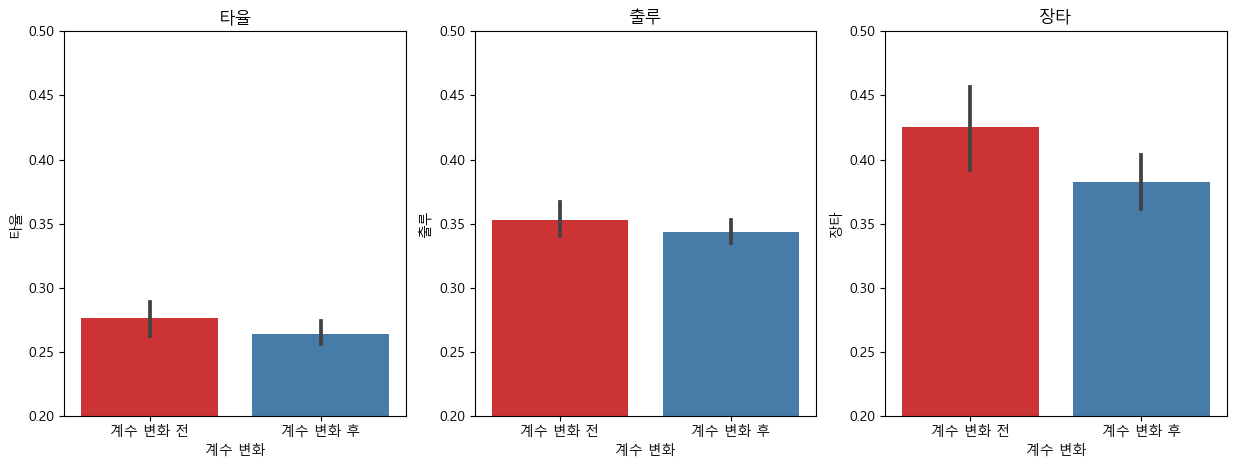

In [78]:
nexen2

nexen2['계수 변화'] = nexen2['연도'].apply(lambda x : '계수 변화 전' if x <= 18 else "계수 변화 후" )

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x = '계수 변화',y = "타율", data = nexen2, ax = ax[0], palette="Set1")
ax[0].set_ylim(0.200, 0.500)
ax[0].set_title('타율')

sns.barplot(x = '계수 변화',y = "출루", data = nexen2, ax = ax[1], palette="Set1")
ax[1].set_ylim(0.200, 0.500)
ax[1].set_title('출루')

sns.barplot(x = '계수 변화',y = "장타", data = nexen2, ax = ax[2], palette="Set1")
ax[2].set_ylim(0.200, 0.500)
ax[2].set_title('장타')